<a href="https://colab.research.google.com/github/AvichalTrivedi7/Generative-AI-Intel-Unnati/blob/main/ANN_1_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Artificial Neural Networks (ANN)**

An **Artificial Neural Networks (ANNs)** are computer systems designed to mimic how the human brain processes information. Just like the brain uses neurons to process data and make decisions, ANNs use artificial neurons to analyze data, identify patterns and make predictions. These networks consist of layers of interconnected neurons that work together to solve complex problems. The key idea is that ANNs can "learn" from the data they process, just as our brain learns from experience. They are used in various applications from recognizing images to making personalized recommendations. In this article, we will see more about ANNs, how they function and other core concepts.

![image.png](attachment:9b475014-ae28-458d-9b32-c73e220de521.png)

### **A. Problem Statement**
### Classify Iris flowers into 3 species using 4 simple measurements (like teaching a robot botanist).

### **B. Objective**
### Build and train first ANN !

### **C. Dataset**
### Iris dataset (sklearn): 150 flowers, 4 features (sepal/petal length/width), 3 species.​

### **D. Tasks Required**
### Load → Visualize → Build ANN → Train live → Predict new flower.

### **E. Step-by-Step Procedure**
- Load Iris data

- Show scatter plots (patterns visible!)

- Split/scale data

- Build 3-layer ANN

- Train 50 epochs (live!)

- Plot learning curves

- Test accuracy

- Predict new flower

**Load and Explore Dataset**

In [ ]:
# Install and import all required libraries
!pip install -q tensorflow scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')

print("All libraries installed and imported successfully!")
print(" Ready for ANN Demo with Iris Dataset")


All libraries installed and imported successfully!
 Ready for ANN Demo with Iris Dataset


In [ ]:
# A. Load Iris Dataset (150 samples, 4 features, 3 classes)
iris = load_iris()
X = iris.data
y = iris.target

print("Dataset shape:", X.shape)
print("\nFeatures:", iris.feature_names)
print("\nTarget classes:", iris.target_names)
print("\nFirst 5 samples:")
print(pd.DataFrame(X[:5], columns=iris.feature_names))


Dataset shape: (150, 4)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Target classes: ['setosa' 'versicolor' 'virginica']

First 5 samples:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


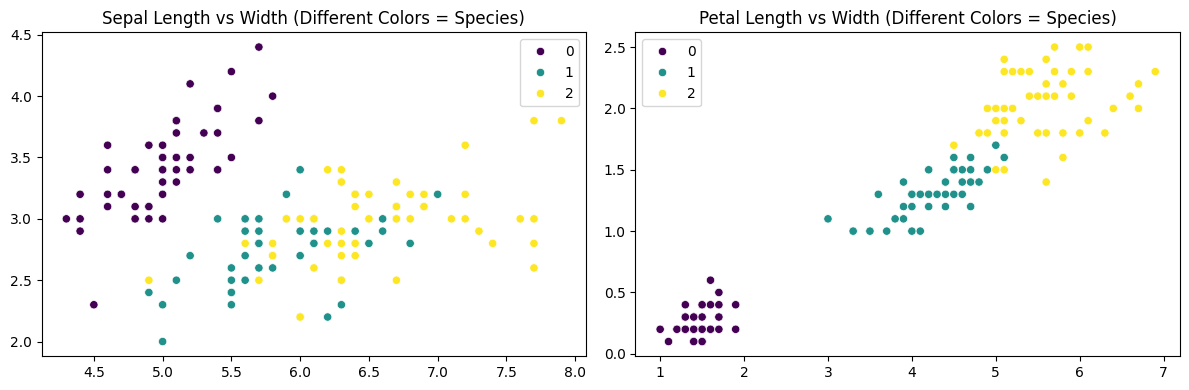

In [ ]:
# Visualize Iris dataset
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette='viridis')
plt.title('Sepal Length vs Width (Different Colors = Species)')

plt.subplot(1,2,2)
sns.scatterplot(x=X[:,2], y=X[:,3], hue=y, palette='viridis')
plt.title('Petal Length vs Width (Different Colors = Species)')

plt.tight_layout()
plt.show()


In [ ]:
# Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Training data shape:", X_train.shape)
print("✅ Test data shape:", X_test.shape)


✅ Training data shape: (120, 4)
✅ Test data shape: (30, 4)


# Structure of Artificial Neural Networks

![image.png](attachment:41990b00-b260-4c10-b27d-e4e76a6f5d34.png)




## **Layers in ANN**

**Input Layer**: Raw data entrance (like eyes seeing fruit features). No processing - just passes info.

**Hidden Layers**: Magic happens here (like brain neurons discussing clues). Multiple layers learn complex patterns step-by-step.

**Output Layer** : Final answer (like mouth saying "It's an apple!").

Why layers? Input=simple data, Hidden=deep thinking, Output=decision. More hidden layers = smarter network for tough problems.​

##  Activation Functions in ANNs

Think of activation as a "decision gate" - converts numbers to Yes/No/Maybe.
Activation functions are important in neural networks because they introduce non-linearity and helps the network to learn complex patterns. Lets see some common activation functions used in ANNs:

-  **Sigmoid Function:** Outputs values between 0 and 1. It is used in binary classification tasks like deciding if an image is a cat or not.

-  **ReLU (Rectified Linear Unit)**: A popular choice for hidden layers, it returns the input if positive and zero otherwise. It helps to solve the vanishing gradient problem.

-  **Tanh (Hyperbolic Tangent)**: Similar to sigmoid but outputs values between -1 and 1. It is used in hidden layers when a broader range of outputs is needed.

-  **Softmax**: Converts raw outputs into probabilities used in the final layer of a network for multi-class classification tasks.
Leaky ReLU: A variant of ReLU that allows small negative values for inputs helps in preventing “dead neurons” during training.

## **Activation Functions**


| Function | Simple Meaning                                                          | When to Use                  | Why Use It                                          |
| -------- | ----------------------------------------------------------------------- | ---------------------------- | --------------------------------------------------- |
| ReLU     | "If positive, pass; if negative, zero it out" (like ignoring bad clues) | Hidden layers (most common)  | Fast training, avoids stuck learning                |
| Sigmoid  | "S-curve: Low→0, Medium→0.5, High→1" (like confidence 0-100%)           | Output for Yes/No (binary)   | Gives probability scores                            |
| Tanh     | "S-curve between -1 to +1" (good/bad strength)                          | Hidden layers (older models) | Centers data around zero                            |
| Softmax  | "Turn scores into percentages that add to 100%"                         | Output for multiple choices  | Perfect for "Apple/Orange/Banana?" geeksforgeeks+1​ |

In [ ]:
# B. Build our first Neural Network (3 layers)
model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),  # Hidden layer 1
    layers.Dense(8, activation='relu'),                    # Hidden layer 2
    layers.Dense(3, activation='softmax')                  # Output layer (3 species)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("🧠 Model Architecture:")
model.summary()


🧠 Model Architecture:


2025-12-09 10:58:49.126861: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

### **Epochs and choosing the number of epochs**

**What is an epoch?**

- One epoch = one full pass through the entire training dataset.​

**What actually happens:**

- In each epoch, the model sees all training examples (often in mini‑batches), updates weights many times, and at the end of the epoch you can measure training and validation performance.​

**How to decide the number:**

- Start with a reasonable range (e.g., 20–100 for small problems).

- Use a validation set and monitor performance after each epoch.

- Stop when validation performance stops improving or starts getting worse (early stopping).

In [ ]:
# C. Train the model (Watch the accuracy improve!)
history = model.fit(
    X_train, y_train,
    epochs=50,                    # 50 training iterations
    validation_split=0.2,         # Use 20% for validation
    batch_size=16,                # Process 16 samples at once
    verbose=1                     # Show progress
)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1961 - loss: 1.0465 - val_accuracy: 0.4583 - val_loss: 1.0327
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4265 - loss: 1.0389 - val_accuracy: 0.4583 - val_loss: 1.0172
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5982 - loss: 1.0011 - val_accuracy: 0.5000 - val_loss: 1.0037
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6963 - loss: 0.9836 - val_accuracy: 0.7083 - val_loss: 0.9882
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6690 - loss: 0.9782 - val_accuracy: 0.7500 - val_loss: 0.9717
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7054 - loss: 0.9635 - val_accuracy: 0.8750 - val_loss: 0.9548
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7409 - loss: 0.9378 - val_accuracy: 0.8750 - val_loss: 0.9375
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7969 - loss: 0.9189 - val_accuracy: 0.8750 - val_loss: 0.9201
Epoch

### **Learning curves: meaning and interpretation**
A learning curve is a plot of a metric (often loss or accuracy) versus epoch number for training and validation sets.​

- **What they show:**

    -  How the model’s performance improves (or not) as it trains over time.

- **Typical interpretations:**

   - Training loss down, validation loss down → model is learning and generalizing well.

   - Training loss down, validation loss up → overfitting; the model memorizes training data but fails on unseen data.

   - Both losses flat and high → underfitting; model too simple or not trained enough.

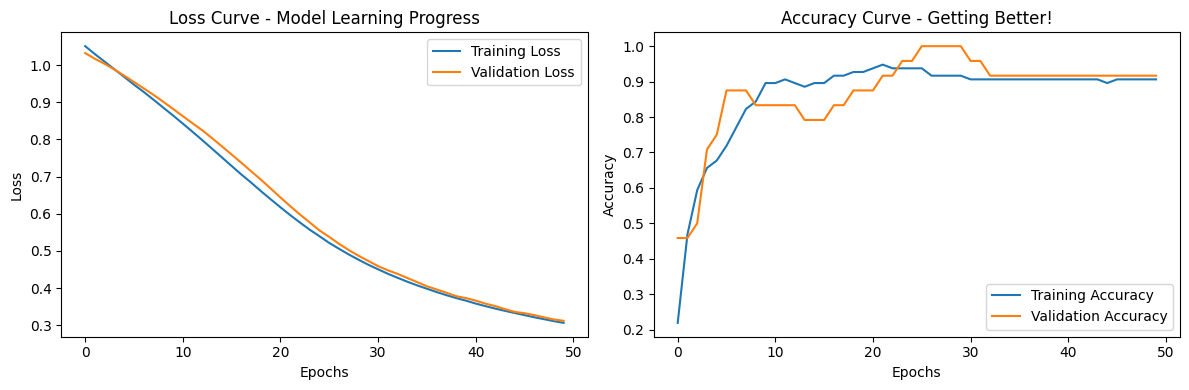

In [ ]:
# D. Visualize Learning Curves
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve - Model Learning Progress')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve - Getting Better!')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### **Learning Curves**
**Loss Curve:** Training error over epochs. Should drop like temperature cooling - steady down = good learning. Sudden jump = problem!
**Accuracy Curve:** Correct predictions rising. Training accuracy ↑↑, Validation accuracy ↑ slower = perfect. If validation drops while training rises = overfitting (like cramming without understanding).​

### **Accuracy Parameters (Which to Use?)**

| Metric    | What it Means                                | Use For                                          |
| --------- | -------------------------------------------- | ------------------------------------------------ |
| Accuracy  | % correct predictions                        | Balanced classes (50-50 apple/orange)            |
| Precision | Of predicted apples, how many really apples? | Costly false alarms (disease prediction)         |
| Recall    | Of real apples, how many caught?             | Missing important cases (cancer detection)       |
| F1-Score  | Balance of Precision+Recall                  | Imbalanced data                                  |
| MSE       | Average squared error (numbers)              | Predicting house prices/numbers                  |
| MAE       | Average error (numbers)                      | Same as MSE, but easier to understand educative​ |

In [ ]:
# E. Final Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"🎉 Test Accuracy: {test_accuracy:.1%}")

# Predict on test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

print("\nFirst 10 Predictions vs Actual:")
for i in range(10):
    print(f"Predicted: {iris.target_names[predicted_classes[i]]}, Actual: {iris.target_names[y_test[i]]}")


🎉 Test Accuracy: 96.7%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step

First 10 Predictions vs Actual:
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor


In [ ]:
# F. Live Demo: Predict new flower measurements
new_flower = np.array([[5.1, 3.5, 1.4, 0.2]])  # Example measurements
new_flower_scaled = scaler.transform(new_flower)

prediction = model.predict(new_flower_scaled)
predicted_species = iris.target_names[np.argmax(prediction)]

print("🌸 New Flower Measurements:", new_flower[0])
print("🤖 Predicted Species:", predicted_species)
print("📊 Prediction Confidence:", f"{np.max(prediction)*100:.1f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
🌸 New Flower Measurements: [5.1 3.5 1.4 0.2]
🤖 Predicted Species: setosa
📊 Prediction Confidence: 97.1%
